Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

Qué variables son significativas para predecir el precio de un automóvil?
Qué tan bien describen esas variables el precio de un automóvil?

In [2]:
#Paso número 1, importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st

# Leer csv
df = pd.read_csv('/Users/guillermocepeda/C:C++/Implementacion_IA_a01284015/Android/precios_autos.csv')
# Primero, quiero categorizar los datos por CarName, así que eliminaré la parte del string que no me interesa
# iterar el string hasta encontrar un ' ' y eliminar todo lo que esté después de eso
# El siguiente código genera un warning que no me permite pasar el ipynb a a pdf, por lo que lo comentaré, pero modificaré el dataset para utilizar esta limpia
#Además cambié el nombre erroneo de ciertos autos para que coincidan con la marca
for i in range(len(df)):
    for j in range(len(df['CarName'][i])):
        if df['CarName'][i][j] == ' ':
            df['CarName'][i] = df['CarName'][i][:j]
            break
    #replace names
    if df['CarName'][i] == 'maxda':
        df['CarName'][i] = 'mazda'
    elif df['CarName'][i] == 'porcshce':
        df['CarName'][i] = 'porsche'
    elif df['CarName'][i] == 'toyouta':
        df['CarName'][i] = 'toyota'
    elif df['CarName'][i] == 'vw': 
        df['CarName'][i] = 'volkswagen'
    elif df['CarName'][i] == 'vokswagen':
        df['CarName'][i] = 'volkswagen'
    elif df['CarName'][i] == 'Nissan':
        df['CarName'][i] = 'nissan'


#Al imprimir los datos del dataset, me dí cuenta que en la marca hay algunos nombres erroneos, los voy a corregir en el siguiente ciclo


# print(df['CarName'])

# #Meter los cambios en el csv
df.to_csv('/Users/guillermocepeda/C:C++/Implementacion_IA_a01284015/Android/precios_autos.csv', index=False)
df = pd.read_csv('/Users/guillermocepeda/C:C++/Implementacion_IA_a01284015/Android/precios_autos.csv')
print(df.head())


   symboling      CarName fueltype      carbody drivewheel enginelocation   
0          3  alfa-romero      gas  convertible        rwd          front  \
1          3  alfa-romero      gas  convertible        rwd          front   
2          1  alfa-romero      gas    hatchback        rwd          front   
3          2         audi      gas        sedan        fwd          front   
4          2         audi      gas        sedan        4wd          front   

   wheelbase  carlength  carwidth  carheight  ...  enginetype cylindernumber   
0       88.6      168.8      64.1       48.8  ...        dohc           four  \
1       88.6      168.8      64.1       48.8  ...        dohc           four   
2       94.5      171.2      65.5       52.4  ...        ohcv            six   
3       99.8      176.6      66.2       54.3  ...         ohc           four   
4       99.4      176.6      66.4       54.3  ...         ohc           five   

  enginesize  stroke  compressionratio  horsepower  peak

Exploración y preparación de la base de datos (Portafolio de Análisis)
Exploración de la base de datos
Calcula medidas estadísticas apropiadas para las variables cuantitativas (media, desviación estándar, cuantiles, etc) y para las cualitativas (cuantiles, frecuencias)

Explora los datos usando herramientas de visualización:
Variables cuantitativas:
Medidas de posición: cuartiles, outlier (valores atípicos), boxplots
Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
Analiza colinealidad (coeficiente de correlación y diagramas de dispersión)
Variables categóricas
Distribución de los datos (diagramas de barras, diagramas de pastel)
Analiza asociación o colinealidad (diagramas de caja y bigote de precio por categoría y barras por categoría) 
Identifica problemas de calidad de datos (valores faltantes, outliers, etc).
Con base en este análisis selecciona al menos 6 variables que consideres importantes para el análisis de las características de los automóviles que determinan su precio.
Preparación de la base de datos:
Selecciona el conjunto de datos a utilizar.
Maneja datos categóricos: transforma a variables dummy si es necesario.
Maneja apropiadamente datos atípicos.
Transforma los datos en caso necesario.
Revisa si es necesario discretizar los datos
Revisa si es necesario escalar y normalizar los datos

Media wheelbase : 98.75658536585367
Desviación estándar wheelbase : 6.021775685025571
Cuartil 1 wheelbase : 94.5
Cuartil 2 wheelbase : 97.0
Cuartil 3 wheelbase : 102.4
El rango intercuartil de la variable  wheelbase  es:  7.900000000000006
El límite inferior es:  82.64999999999999
El límite superior es:  114.25000000000001
El número de outliers es:  3
Correlación entre wheelbase y precio: 0.5778155982921496
Media carlength : 174.04926829268288
Desviación estándar carlength : 12.33728852655518
Cuartil 1 carlength : 166.3
Cuartil 2 carlength : 173.2
Cuartil 3 carlength : 183.1
El rango intercuartil de la variable  carlength  es:  16.799999999999983
El límite inferior es:  141.10000000000002
El límite superior es:  208.29999999999995
El número de outliers es:  0
Correlación entre carlength y precio: 0.6829200156779629
Media carwidth : 65.90780487804878
Desviación estándar carwidth : 2.145203852687183
Cuartil 1 carwidth : 64.1
Cuartil 2 carwidth : 65.5
Cuartil 3 carwidth : 66.9
El rango in

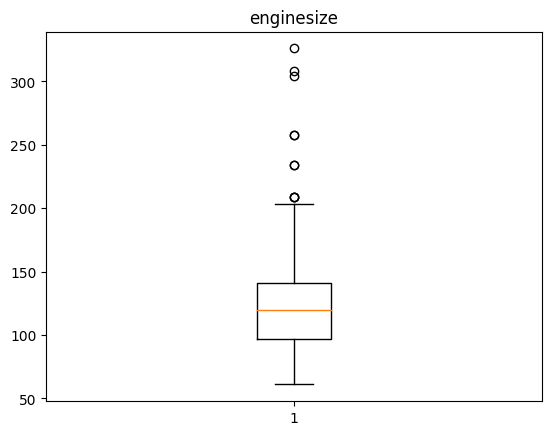

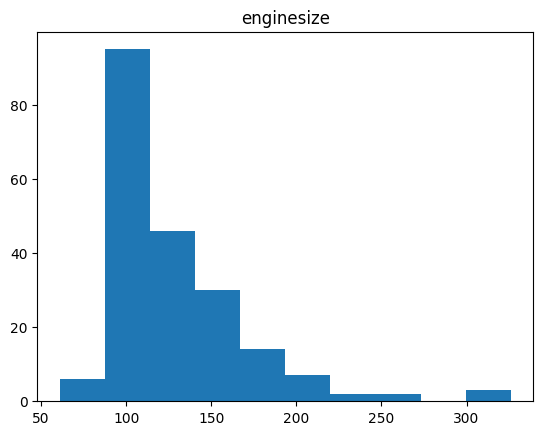

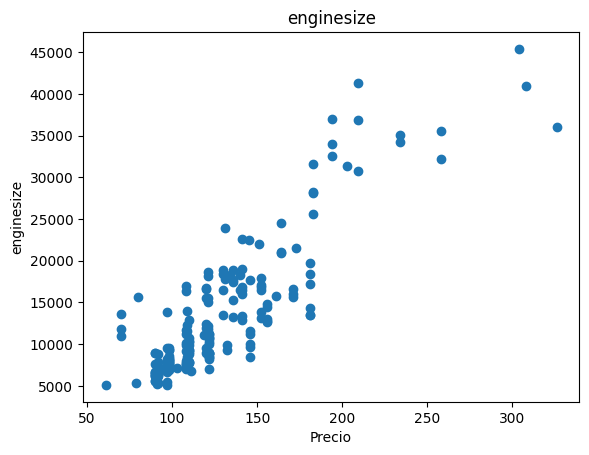

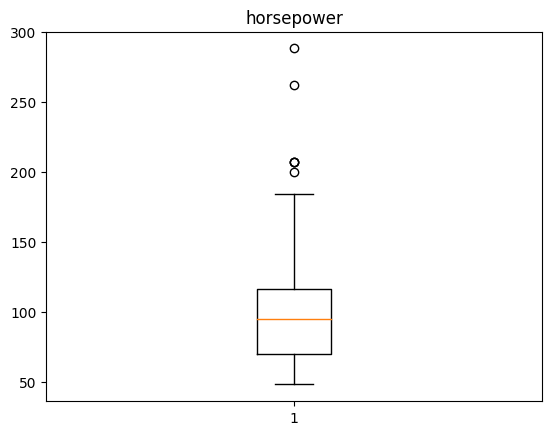

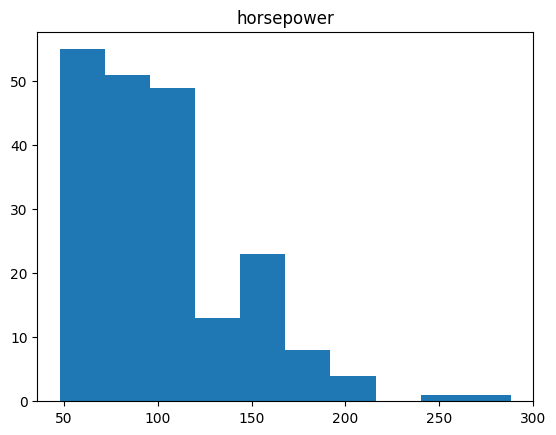

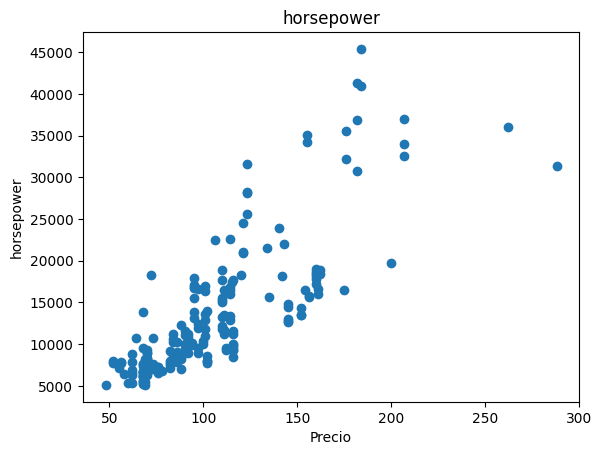

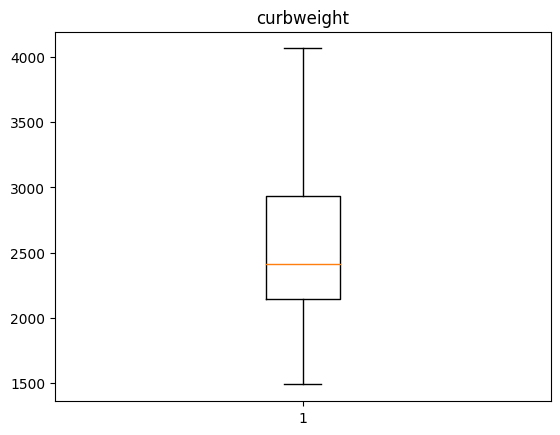

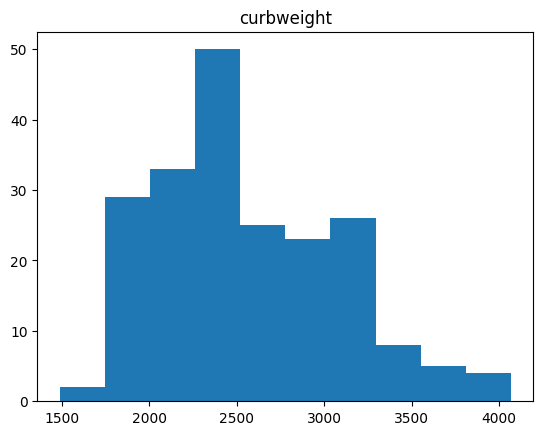

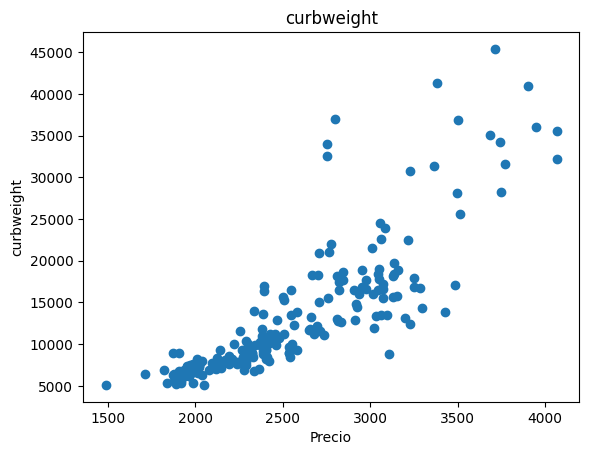

[[F_onewayResult(statistic=549.3369099474367, pvalue=1.424383876925624e-77), 'enginelocation'], [F_onewayResult(statistic=551.8598958857361, pvalue=8.318140862494038e-78), 'fueltype'], [F_onewayResult(statistic=555.3893552944344, pvalue=3.9288777838187185e-78), 'cylindernumber'], [F_onewayResult(statistic=556.7975158344432, pvalue=2.9149680435064827e-78), 'enginetype'], [F_onewayResult(statistic=557.791232237234, pvalue=2.3619288790032727e-78), 'drivewheel'], [F_onewayResult(statistic=560.0298761539955, pvalue=1.471568011446348e-78), 'carbody'], [F_onewayResult(statistic=562.1838959430595, pvalue=9.343530980946707e-79), 'symboling'], [F_onewayResult(statistic=564.9797128734316, pvalue=5.1894200288398704e-79), 'CarName']]


/var/folders/sn/y2qf8smj02bf86p11nqfldzc0000gn/T/ipykernel_1548/2577217321.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cualitatitvo[strr] = df_precio
/var/folders/sn/y2qf8smj02bf86p11nqfldzc0000gn/T/ipykernel_1548/2577217321.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cualitatitvo[strr][df_cualitatitvo[df_cualitatitvo.columns[i]] == frecuencias[i].index[j]] = frecuencias[i].values[j]
/var/folders/sn/y2qf8smj02bf86p11nqfldzc0000gn/T/ipykernel_1548/2577217321.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

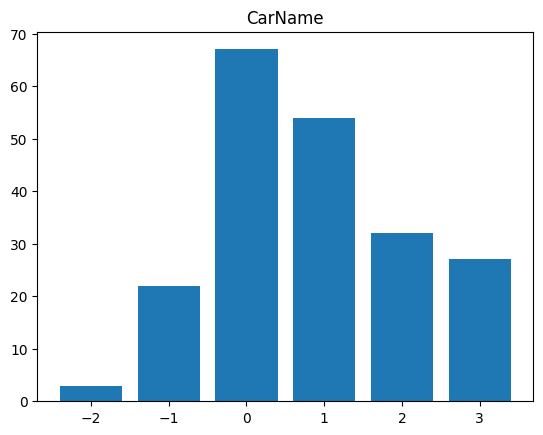

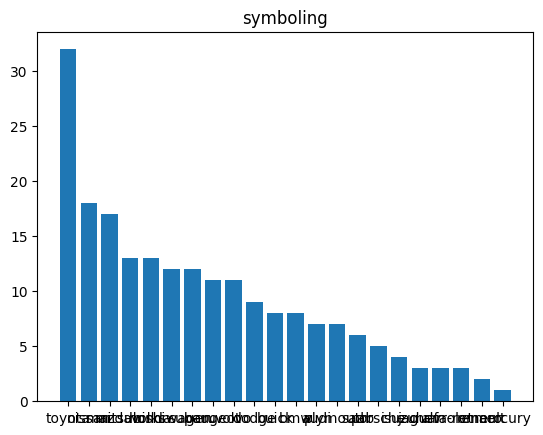

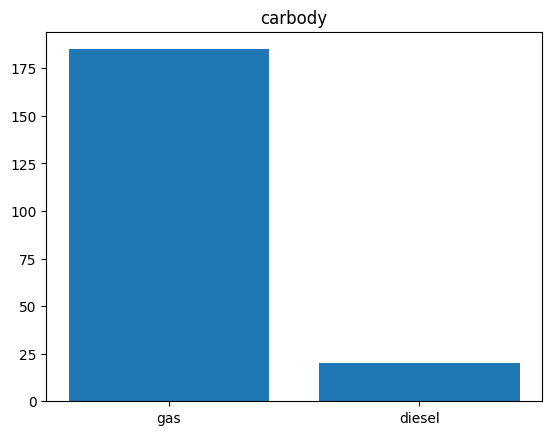

IndexError: index 3 is out of bounds for axis 0 with size 3

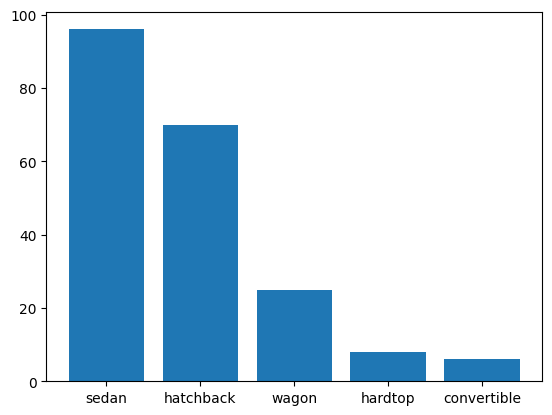

In [6]:
# Exploración y preparación de la base de datos (Portafolio de Análisis)
# Exploración de la base de datos
# Calcula medidas estadísticas apropiadas para las variables cuantitativas (media, desviación estándar, cuantiles, etc) y para las cualitativas (cuantiles, frecuencias)
#Para esto, primero voy a generar dos dataframes, uno cuantitativo y uno cualitativo, así como dejar el precio en otra variable


df_cuantitativo = df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
df_cualitatitvo = df[['symboling','CarName','fueltype','carbody','drivewheel','enginelocation','enginetype','cylindernumber']]

df_precio = df['price']
#print shape
# print(df_cuantitativo.head())
# print(df_cualitatitvo.head())
#definimos las dimensiones de los dataframes
ct_width = 12
cl_width = 8
lenght = 205

# #para las variables cuantitativas, calcularé la media, desviación estándar, cuantiles, etc
medias = []
desviaciones = []
cuantiles = []
for i in range(ct_width):
    #calcular cada métrica para cada columna y agregarla a la lista
    medias.append(df_cuantitativo.iloc[:,i].mean())
    desviaciones.append(df_cuantitativo.iloc[:,i].std())
    cuantiles.append(df_cuantitativo.iloc[:,i].quantile([0.25,0.5,0.75]))

# #para las variables cualitativas, calcularé las frecuencias
frecuencias = []

for i in range(cl_width):
    f_i = df_cualitatitvo.iloc[:,i].value_counts()
    frecuencias.append(f_i)


# Explora los datos usando herramientas de visualización: Medidas de posición: cuartiles, outlier (valores atípicos), boxplots
#Creamos un boxplot para cada variable cuantitativa así como su media, desviación estándar, cuartiles, etc
coef_correlacion   = []
for i in range(ct_width):

    IRC = cuantiles[i][0.75] - cuantiles[i][0.25]
    print("Media" , df_cuantitativo.columns[i], ":", medias[i])
    print("Desviación estándar" , df_cuantitativo.columns[i], ":", desviaciones[i])
    print("Cuartil 1" , df_cuantitativo.columns[i], ":", cuantiles[i][0.25])
    print("Cuartil 2" , df_cuantitativo.columns[i], ":", cuantiles[i][0.5])
    print("Cuartil 3" , df_cuantitativo.columns[i], ":", cuantiles[i][0.75])
    print('El rango intercuartil de la variable ',df_cuantitativo.columns[i],' es: ',IRC)
    print('El límite inferior es: ', cuantiles[i][0.25] - 1.5*IRC)
    print('El límite superior es: ', cuantiles[i][0.75] + 1.5*IRC)
    print('El número de outliers es: ', len(df_cuantitativo[df_cuantitativo.iloc[:,i] > cuantiles[i][0.75] + 1.5*IRC]))
    print("Correlación entre", df_cuantitativo.columns[i], "y precio:", df_cuantitativo.iloc[:,i].corr(df_precio))
    coef = [df_cuantitativo.iloc[:,i].corr(df_precio), df_cuantitativo.columns[i]]
    coef_correlacion.append(coef)


#Ordenamos los coeficientes de correlación de menor a mayor pero bajo el primer argumento de la tupla
coef_correlacion.sort(key=lambda x: x[0])
# print(coef_correlacion)

#Nos quedamos con los 3 con mayor correlacion 
df_cuantitativo = df_cuantitativo[['enginesize','horsepower','curbweight']] 
#Graficamos 
#array para número de categorías por variable
cl_number = []
for i in range(3):
    #Graficamos los boxplots
    plt.figure()
    plt.boxplot(df_cuantitativo.iloc[:,i])
    plt.title(df_cuantitativo.columns[i])
    plt.show()
        #Graficamos histograma para ver la simetría de los datos
    plt.figure()
    plt.hist(df_cuantitativo.iloc[:,i])
    plt.title(df_cuantitativo.columns[i])
    plt.show()
    #Graficamos la correlación entre la variable y el precio
    plt.figure()
    plt.scatter(df_cuantitativo.iloc[:,i], df_precio)
    plt.title(df_cuantitativo.columns[i])
    plt.xlabel('Precio')
    plt.ylabel(df_cuantitativo.columns[i])
    plt.show()


anova_results = []
for i in range(cl_width):
    strr = df_cualitatitvo.columns[i]+'_avg'
    df_cualitatitvo[strr] = df_precio
    #hacer promedio para cada categoría y agregarlo en df_cualitativo[strr]
    for j in range(len(frecuencias[i])):
        df_cualitatitvo[strr][df_cualitatitvo[df_cualitatitvo.columns[i]] == frecuencias[i].index[j]] = frecuencias[i].values[j]
    #ANOVA

for i in range (cl_width):
    anova_con_tag = [st.f_oneway(df_cualitatitvo[df_cualitatitvo.columns[i]+'_avg'], df_precio), df_cualitatitvo.columns[i]]
    anova_results.append(anova_con_tag)

#sortear por el estadístico F de la primera entrada de la tupla
anova_results.sort(key=lambda x: x[0][0])
print(anova_results)

#Nos quedamos con las 3 variables con mayor estadístico F
df_cualitatitvo = df_cualitatitvo[['CarName','symboling','carbody']]

#Graficamos las frecuencias de cada categoría
for i in range(cl_width):
    plt.figure()
    plt.bar(frecuencias[i].index, frecuencias[i].values)
    plt.title(df_cualitatitvo.columns[i])
    plt.show()
    
# #Graficamos la correlación entre cada variable y el precio
# for i in range(cl_width):
#     plt.figure()
#     plt.scatter(df_cualitatitvo.iloc[:,i], df_precio)
#     plt.title(df_cualitatitvo.columns[i])
#     plt.xlabel('Precio')
#     plt.ylabel(df_cualitatitvo.columns[i])
#     plt.show()

plt.figure()
plt.bar(df_cualitatitvo['CarName'], df_precio)
plt.title('CarName')
plt.show()




plt.figure()
plt.scatter(df_cualitatitvo['CarName'], df_precio)
plt.title('CarName')
plt.xlabel('Precio')
plt.ylabel('CarName')
plt.show()

plt.figure()
plt.scatter(df_cualitatitvo['carbody'], df_precio)
plt.title('carbody')
plt.xlabel('Precio')
plt.ylabel('carbody')
plt.show()

plt.figure()
plt.scatter(df_cualitatitvo['symboling'], df_precio)
plt.title('symboling')
plt.xlabel('Precio')
plt.ylabel('symboling')
plt.show()

    


En base al análisis pasado, podemos concluir que las variables enginesize, horsepower, ribeweight, CarName, symboling y carbody son las que tienen una mayor correlacion con el precio del automóvil y son aquellas las que nos ayudan a responder la pregunta de Qué variables son significativas para predecir el precio de un automóvil?

La siguiente pregunta Qué tan bien describen esas variables el precio de un automóvil? Será respondida utilizando un modelo regresión para nuestras variables

In [ ]:
df_cuantitativo = df_cuantitativo[['enginesize','horsepower','curbweight']] 
df_cualitatitvo = df_cualitatitvo[['CarName','symboling','carbody']]

#cambiar las variables cualitativas a cuantitativas con one hot encoding
df_cualitatitvo = pd.get_dummies(df_cualitatitvo, columns=['CarName','symboling','carbody'])
print(df_cualitatitvo.head())


NameError: name 'df_cuantitativo' is not defined